# Preprocessing

In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)

data = pandas.read_csv('../datasets/SpotifyAudioFeatures-full-29Nov.csv')
data['duration'] = data['duration_ms']*(1/1000)*(1/60)
data = data.drop(labels='Unnamed: 0',axis=1)
data = data.drop(labels='duration_ms',axis=1)
data = data.drop(labels='artist_name',axis=1)
data = data.drop(labels='track_name',axis=1)
data = data.drop(labels='track_id',axis=1)

# We want to transform popularity to 
print(pd.qcut(data['popularity'], 4))
data['popularity'] = pd.qcut(data['popularity'], 4,labels=[0,1,2,3])
data['artist_popularity'] = pd.qcut(data['artist_popularity'], 4,labels=[0,1,2,3])
data.head()

0       (67.0, 100.0]
1       (67.0, 100.0]
2       (67.0, 100.0]
3       (67.0, 100.0]
4       (67.0, 100.0]
            ...      
8687    (50.0, 61.0] 
8688    (50.0, 61.0] 
8689    (67.0, 100.0]
8690    (67.0, 100.0]
8691    (50.0, 61.0] 
Name: popularity, Length: 8692, dtype: category
Categories (4, interval[float64]): [(-0.001, 50.0] < (50.0, 61.0] < (61.0, 67.0] < (67.0, 100.0]]


,popularity,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
0,3,1,9,5,19671232,3,0.695,0.762,0,-3.497,1,0.040,0.192,2.440e-03,0.086,0.553,120.042,4,7,11,3.588
1,3,1,10,5,7153061,3,0.598,0.427,7,-8.764,0,0.032,0.055,5.830e-06,0.210,0.060,76.469,4,19,12,2.929
2,3,2,10,5,6183091,3,0.474,0.631,5,-5.884,0,0.343,0.069,0.000e+00,0.132,0.425,180.051,4,40,10,3.155
3,3,1,10,3,17952498,3,0.505,0.340,4,-9.005,1,0.044,0.576,0.000e+00,0.210,0.092,101.993,4,19,12,3.441
4,3,1,8,5,2549258,3,0.778,0.559,6,-7.109,0,0.078,0.128,0.000e+00,0.399,0.678,129.989,1,15,9,3.085


## Description of numeric values

In [55]:
data.describe(include=[np.number])

,num_artists,release_month,release_weekday,artist_followers,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
count,8692.000,8692.000,8692.000,8.692e+03,8692.000,8.692e+03,8692.000,8692.000,8692.000,8692.000,8692.000,8.692e+03,8692.000,8692.000,8692.000,8692.000,8692.000,8692.000,8692.000
mean,1.788,7.976,4.605,2.496e+06,0.576,5.030e-01,5.083,-10.596,0.643,0.112,0.418,1.815e-01,0.177,0.440,117.307,3.861,26.324,12.088,3.519
std,1.202,3.163,1.068,5.313e+06,0.206,2.735e-01,3.569,7.578,0.479,0.121,0.378,3.428e-01,0.144,0.240,32.037,0.539,25.483,5.474,1.799
min,1.000,1.000,1.000,0.000e+00,0.000,2.020e-05,0.000,-43.710,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,1.000,2.000,0.101
25%,1.000,5.000,5.000,1.733e+05,0.430,2.660e-01,2.000,-14.428,0.000,0.040,0.065,0.000e+00,0.098,0.245,91.987,4.000,9.000,8.000,2.693
50%,1.000,9.000,5.000,1.032e+06,0.603,5.575e-01,5.000,-7.331,1.000,0.055,0.281,7.145e-06,0.119,0.427,116.303,4.000,16.000,11.000,3.250
75%,2.000,11.000,5.000,2.943e+06,0.738,7.190e-01,8.000,-5.388,1.000,0.129,0.855,5.047e-02,0.197,0.616,139.983,4.000,34.000,15.000,3.820
max,16.000,11.000,7.000,5.466e+07,0.981,1.000e+00,11.000,0.634,1.000,0.951,0.996,9.980e-01,0.986,0.980,241.005,5.000,233.000,49.000,25.785


Histograms


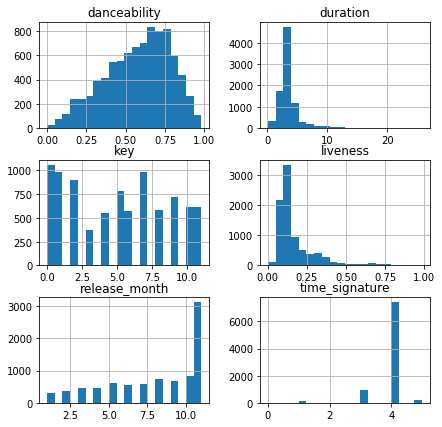

In [56]:
data.hist(column=['popularity', 'danceability', 'key','liveness', 'duration', 'time_signature', 'release_month'],  bins=20, figsize=[7,7])
print("Histograms")

## Identify errors or ouliers - univariate analysis

In [57]:
data[data.duration>data.duration.mean()+5*data.duration.std()]

,popularity,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
1180,3,1,8,5,1032672,2,0.461,0.566,9,-9.133,0,0.057,9.890e-03,0.786,0.109,0.387,88.067,1,10,4,12.741
1568,3,1,8,5,1032672,2,0.323,0.803,7,-7.397,1,0.037,7.350e-05,0.834,0.096,0.386,144.755,5,7,4,15.725
1684,3,1,8,5,1032672,2,0.330,0.610,10,-9.571,1,0.049,2.190e-03,0.769,0.107,0.240,172.677,1,10,4,13.631
1833,0,1,11,5,3887175,3,0.326,0.898,2,-5.658,1,0.075,7.170e-01,0.877,0.227,0.356,109.044,4,37,13,13.089
4667,0,2,11,5,2350327,2,0.310,0.113,2,-15.995,0,0.043,9.950e-01,0.536,0.107,0.453,87.473,3,63,21,15.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,0,4,11,5,2942677,1,0.259,0.111,0,-22.765,1,0.037,9.850e-01,0.877,0.069,0.165,69.406,4,71,20,17.583
7689,0,9,11,5,2942677,1,0.289,0.222,0,-16.821,1,0.070,9.440e-01,0.001,0.096,0.156,82.209,3,233,20,15.221
7706,0,4,11,5,2942677,1,0.358,0.139,3,-18.998,1,0.036,9.700e-01,0.869,0.077,0.115,131.154,4,77,20,20.889
7726,0,4,11,5,2942677,1,0.280,0.083,2,-21.032,1,0.045,9.430e-01,0.575,0.068,0.103,111.448,4,72,20,24.388


We can see above some very long songs (more than 10 minutes). Since there are a lot of them we can assure they aren't outliers or errors.

### Common error checkups

In [58]:
data[data.release_month > 12]
data[data.release_weekday > 7]
data[data.num_artists < 1]

,popularity,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration


## Boxplots and histograms

Boxplots


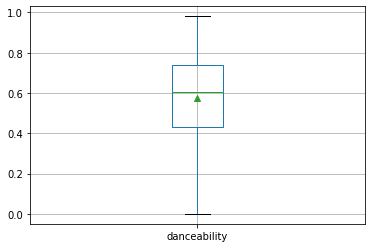

In [59]:
data.boxplot(column=['danceability'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

## Normalization

We first create our labels by dividing the 'popularity' feature into three categories. With that we try a simple knn classifier and see its score. We then check the range of each numerical feature to see if a low score can be attributed to the data not being normalized.

In [60]:
dat = data.apply(pandas.to_numeric)
dat['popularity'] = pandas.qcut(dat['popularity'], 3, labels=[1, 2, 3]) # 1=not popular, 2=popular, 3=very popular

X_data = dat.drop(labels='popularity',axis=1).to_numpy()
Y_data = dat['popularity'].to_numpy()
dat.describe()

,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
count,8692.000,8692.000,8692.000,8.692e+03,8692.000,8692.000,8.692e+03,8692.000,8692.000,8692.000,8692.000,8692.000,8.692e+03,8692.000,8692.000,8692.000,8692.000,8692.000,8692.000,8692.000
mean,1.788,7.976,4.605,2.496e+06,1.366,0.576,5.030e-01,5.083,-10.596,0.643,0.112,0.418,1.815e-01,0.177,0.440,117.307,3.861,26.324,12.088,3.519
std,1.202,3.163,1.068,5.313e+06,1.105,0.206,2.735e-01,3.569,7.578,0.479,0.121,0.378,3.428e-01,0.144,0.240,32.037,0.539,25.483,5.474,1.799
min,1.000,1.000,1.000,0.000e+00,0.000,0.000,2.020e-05,0.000,-43.710,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,1.000,2.000,0.101
25%,1.000,5.000,5.000,1.733e+05,0.000,0.430,2.660e-01,2.000,-14.428,0.000,0.040,0.065,0.000e+00,0.098,0.245,91.987,4.000,9.000,8.000,2.693
50%,1.000,9.000,5.000,1.032e+06,1.000,0.603,5.575e-01,5.000,-7.331,1.000,0.055,0.281,7.145e-06,0.119,0.427,116.303,4.000,16.000,11.000,3.250
75%,2.000,11.000,5.000,2.943e+06,2.000,0.738,7.190e-01,8.000,-5.388,1.000,0.129,0.855,5.047e-02,0.197,0.616,139.983,4.000,34.000,15.000,3.820
max,16.000,11.000,7.000,5.466e+07,3.000,0.981,1.000e+00,11.000,0.634,1.000,0.951,0.996,9.980e-01,0.986,0.980,241.005,5.000,233.000,49.000,25.785


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb
import numpy as np

cv = StratifiedKFold(n_splits=10, random_state=1) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_data,y=Y_data, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.5836802628057465

In [62]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,20,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X_data, Y_data)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 13, 'weights': 'distance'} Accuracy= 0.6002070869765301


In [63]:
for i in range(len(X_data[1,:])):
    print('std:',X_data[:,i].std(),'min',X_data[:,i].min(),'max',X_data[:,i].max())

std: 1.20205437745497 min 1.0 max 16.0
std: 3.1626219260245687 min 1.0 max 11.0
std: 1.0677083151229125 min 1.0 max 7.0
std: 5312538.312650487 min 0.0 max 54656985.0
std: 1.1044778483162683 min 0.0 max 3.0
std: 0.20610144805174987 min 0.0 max 0.981
std: 0.27344366410409376 min 2.02e-05 max 1.0
std: 3.568549823179129 min 0.0 max 11.0
std: 7.5775726818380305 min -43.71 max 0.634
std: 0.479181916635648 min 0.0 max 1.0
std: 0.12116329851382378 min 0.0 max 0.951
std: 0.37815291397229045 min 0.0 max 0.996
std: 0.3427808101655043 min 0.0 max 0.998
std: 0.14438707068518852 min 0.0 max 0.986
std: 0.23981047734195707 min 0.0 max 0.98
std: 32.03551877978578 min 0.0 max 241.005
std: 0.5394045374014891 min 0.0 max 5.0
std: 25.481160619887188 min 1.0 max 233.0
std: 5.473355858118832 min 2.0 max 49.0
std: 1.7985452927147971 min 0.10103333333333334 max 25.785066666666665


In [64]:
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X_data)
X2=scaler.transform(X_data)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 1.0 min -0.6553246374131798 max 11.823312170813837
std: 1.0 min -2.2057141245165575 max 0.956219307270545
std: 1.0 min -3.3765346899393363 max 2.2429776010268454
std: 1.0 min -0.46991539102468605 max 9.818384058947846
std: 0.9999999999999999 min -1.2368593514661375 max 1.4793562834362541
std: 1.0000000000000002 min -2.795316878487137 max 1.964475006884194
std: 1.0 min -1.8395771535074206 max 1.8174093898682213
std: 1.0 min -1.4242773523737737 max 1.6582072828555543
std: 0.9999999999999999 min -4.37002997300971 max 1.4819759214746746
std: 1.0 min -1.3414007147816598 max 0.7454893895466356
std: 1.0 min -0.9236985381274513 max 6.925212903413556
std: 1.0 min -1.1051018692337735 max 1.5287532808893933
std: 0.9999999999999999 min -0.5296325624214641 max 2.381848974477107


In [65]:
# Let's repeat the 10-fold Cross-validation with new data X2
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1,iid='False')  # If cv is integer, by default is Stratifyed 
clf.fit(X2, Y_data)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 19, 'weights': 'distance'} Accuracy= 0.6371375977910723


In [66]:
dat.to_csv('../datasets/SpotifyDataset.csv')

In [67]:
df = pd.read_csv('../datasets/SpotifyDataset.csv')
df.head()

,Unnamed: 0,popularity,num_artists,release_month,release_weekday,artist_followers,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_len,artist_len,duration
0,0,3,1,9,5,19671232,3,0.695,0.762,0,-3.497,1,0.040,0.192,2.440e-03,0.086,0.553,120.042,4,7,11,3.588
1,1,3,1,10,5,7153061,3,0.598,0.427,7,-8.764,0,0.032,0.055,5.830e-06,0.210,0.060,76.469,4,19,12,2.929
2,2,3,2,10,5,6183091,3,0.474,0.631,5,-5.884,0,0.343,0.069,0.000e+00,0.132,0.425,180.051,4,40,10,3.155
3,3,3,1,10,3,17952498,3,0.505,0.340,4,-9.005,1,0.044,0.576,0.000e+00,0.210,0.092,101.993,4,19,12,3.441
4,4,3,1,8,5,2549258,3,0.778,0.559,6,-7.109,0,0.078,0.128,0.000e+00,0.399,0.678,129.989,1,15,9,3.085
